# Intro to `pandas`

`pandas` is the `panel data system` ([comments on pronunciation](https://twitter.com/wesmckinn/status/706529447965433856))

## Super-basic intro

Material here includes basic examples taken from the [learn-pandas Bitbucket repo](https://bitbucket.org/hrojas/learn-pandas)

Set up a small `DataFrame` for experimenting. This is artificial, as we will almost always be importing data from some external source ...

In [1]:
import pandas as pd
# The initial set of baby names and bith rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]
z = list(zip(names,births))
p = pd.DataFrame(z)
p    ## notebooks automatically print the *last* result returned in each chunk

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


Various ways of indexing. (Note the current example is a little artificial; normally the columns (`Series`) within the data frame will have meaningful names we'll use to index. In addition, the rows may have a **key** assigned that we'll be able to use to (very efficiently) index and sort by row.  For now, though, the column and row indices are just integers ...)

In [2]:
p[1]        ## extract a column = Series (by *name*)
p[2:3]      ## slice one row
p[2:5]      ## slice multiple rows
p[[0,1]]    ## extract multiple columns (data frame)
p.iloc[1,1] ## index with row/column integers like an array

155

In [3]:
p.rename(columns={0:"names", 1:"count"}, inplace=True)  ## add names
p["names"]          ## extract by column index (name)    
p.names             ## extract as attribute
p.loc[1:2,"names"]  ## index by *label*, _inclusive_

1    Jessica
2       Mary
Name: names, dtype: object

Figuring out where I am so I can find the appropriate data file ...

In [4]:
import os
os.getcwd()

'/media/sf_Documents/classes/math1mp3/math1mp/notes'

# Measles data

I downloaded US measles data from [Project Tycho](https://www.tycho.pitt.edu/index.php).

- `read_csv` reads a CSV file as a **data frame**; it automatically interprets the first row as headings
- `df.head()` shows just at the beginning; `df.tail()` shows just the end





In [5]:
v = "./MEASLES_Cases_1909-2001_20150322001618.csv"  ## file name
p  = pd.read_csv(v,skiprows=2,na_values=["-"])      ## read in data

`.info()` gives us basic information about a DataFrame (doing a little bit of magic here so we don't have to look at the whole thing, which is long)

In [6]:
%%capture capt
p.info()

In [7]:
print(capt.stdout[1:499]+"...")

class 'pandas.core.frame.DataFrame'>
RangeIndex: 4861 entries, 0 to 4860
Data columns (total 62 columns):
YEAR                        4861 non-null int64
WEEK                        4861 non-null int64
ALABAMA                     2154 non-null float64
ALASKA                      704 non-null float64
AMERICAN SAMOA              3 non-null float64
ARIZONA                     2353 non-null float64
ARKANSAS                    1870 non-null float64
CALIFORNIA                  2997 non-null float64
...


In [8]:
p.head()                     ## look at the first little bit

,YEAR,WEEK,ALABAMA,ALASKA,AMERICAN SAMOA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,...,UPSTATE NEW YORK,UTAH,VERMONT,VIRGIN ISLANDS,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,Unnamed: 61
0,1909,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1909,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1909,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1909,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1909,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since this starts at the beginning, before data is available for most states, most of the cells are filled with `NaN` values (which stands for "not a number"), which `pandas` uses to denote missingness. However, let's just ignore them for now.

Let's be ambitious and plot *all* the data (leaving out the `WEEK` and `YEAR` columns) as a function of time, with a log-scaled y axis (`plt.semilogy()`) ...

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
all_data = p.loc[:,"ALABAMA":"WYOMING"]
## equivalently: all_data=p.drop(["YEAR","WEEK","Unnamed: 61"])
ax.semilogy(all_data);

In [10]:
import numpy as np
a = np.nan
b = np.nan
pd.Series(a).isnull()

0    True
dtype: bool



We can use `.isnull()` to test whether values are missing or not (testing whether they are equal to the special value `numpy.nan`  **does not work** ...)


In [11]:
p.ALABAMA.isnull().head()

0    True
1    True
2    True
3    True
4    True
Name: ALABAMA, dtype: bool

`.sum()` applied to a logical array counts the number of `True` values ...

In [12]:
p.ALABAMA.isnull().sum()

2707

Let's say we want to get the number of missing values in *every* column. First we'll use `.isnull()` on the whole DataFrame, then `.sum()` to count the number missing in each column

In [13]:
all_missing = all_data.isnull()
n_all_miss = all_missing.sum()
n_all_miss.head()

ALABAMA           2707
ALASKA            4157
AMERICAN SAMOA    4858
ARIZONA           2508
ARKANSAS          2991
dtype: int64

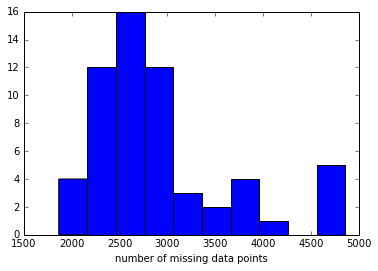

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(n_all_miss)  ## do this in a "non-pythonic" way (auto plot setup)
plt.xlabel("number of missing data points");


In [15]:
n_all_miss.sort_values().tail(6)

ALASKA                      4157
VIRGIN ISLANDS              4788
NORTHERN MARIANA ISLANDS    4848
GUAM                        4850
PAC TRUST TERR              4851
AMERICAN SAMOA              4858
dtype: int64

We can also do the sum across rows (`axis=1`) and plot the results ...

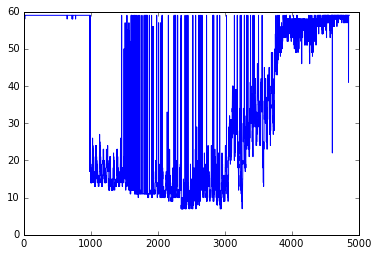

In [16]:
tot_missing = all_missing.sum(axis=1)
plt.plot(tot_missing);

If we try to do any operations with Series with `nan` values in them we're in trouble ...

In [17]:
sum(p.ALABAMA)

nan

Unfortunately this makes sense. "Anything + `nan`" *should* be `nan`; so should "Anything * `nan`" ... If we just want to get rid of `nan` values we can use `.dropna()` ...

In [18]:
ALABAMA_nona = p.ALABAMA.dropna()
print(sum(ALABAMA_nona))
## ~ (tilde/twiddle) is "logical not" for pandas objects ...
(len(p.ALABAMA),sum(~p.ALABAMA.isnull()),len(ALABAMA_nona))

209536.0


(4861, 2154, 2154)

Now we might want to figure out how far we have to go in a series to find the first non-`NaN` value ... it's a little sneaky we can use `.argmin()` for this ...

- `.isnull()` turns `nan` values to `True`, which in turn gets translated to 1 when we do a numerical operation
- `.argmin()` returns the index of the **first** occurrence of the minumum value, which is 0 = `False` = not `nan`

In [19]:
first_alabama = p.ALABAMA.isnull().argmin()
print(first_alabama)

985


Which time period does this correspond to?

In [20]:
p.loc[first_alabama,"YEAR":"WEEK"]

YEAR    1927.0
WEEK      47.0
Name: 985, dtype: float64

Let's make a function to simplify this a bit ...

In [21]:
def first_val(x):
    return(x.isnull().argmin())

Now we want to run this on all of the data columns (not the `YEAR` and `WEEK` columns). We could use a `for` loop, but it's more compact and pandas-ish to use `.apply()` for this.  In general, `.apply()` takes *any* function and runs it on each column of a DataFrame.

In [22]:
all_first_vals = all_data.apply(first_val)
all_first_vals.head()


ALABAMA            985
ALASKA            2348
AMERICAN SAMOA    4125
ARIZONA            985
ARKANSAS           985
dtype: int64

What if we want a histogram of all of the non-`nan` data?  First we `.unstack()` the data to convert it into a single vector, then we `.dropna()`, then we plot the histogram of $\log(1+x)$ ...

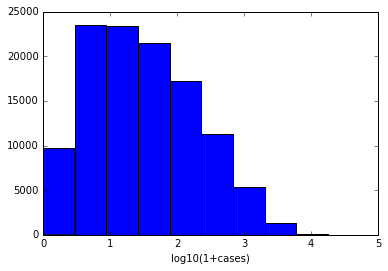

In [23]:
import numpy as np
plt.hist(np.log10(1+all_data.unstack().dropna()))
plt.xlabel("log10(1+cases)");

# Data cleaning

In [24]:
p.max().sort_values().tail()

NEW YORK           8831.0
OHIO               9278.0
KENTUCKY          10402.0
VIRGIN ISLANDS    53000.0
Unnamed: 61           NaN
dtype: float64

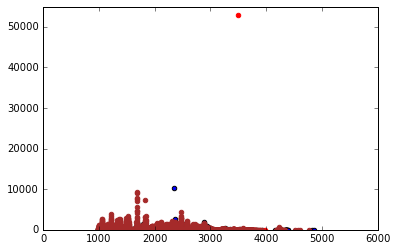

In [25]:
plt.scatter(p.index,p.KENTUCKY)
plt.scatter(p.index,p["VIRGIN ISLANDS"],color="red")
plt.scatter(p.index,p.OHIO,color="brown");
plt.ylim(0,55000);

In [26]:
bad_ind = p.index[p["VIRGIN ISLANDS"]>40000]
p.loc[bad_ind,"VIRGIN ISLANDS"] = np.nan
## shortcut
p.loc[p.KENTUCKY>8000,"KENTUCKY"] = np.nan

check again ...

In [27]:
p.max().sort_values().tail()

ALABAMA         7101.0
PENNSYLVANIA    7982.0
NEW YORK        8831.0
OHIO            9278.0
Unnamed: 61        NaN
dtype: float64

## Filtering

Choosing specific rows of a data frame; `&`, `|` ,`~` correspond to `and`, `or`, `not`
(individual elements *must* be in parentheses)


In [28]:
p.ALABAMA[(p.YEAR==1970) & (p.ALABAMA>50)]               

3235    98.0
3236    56.0
3238    69.0
Name: ALABAMA, dtype: float64

## Indexing

Use `.index()` to assign an index to the *rows* of a DataFrame; the rows can be used in `.loc()`, will also be included automatically as the x-axis variable in any plots ...

In [37]:
good_vals = first_val(p.ALABAMA)
p_short = p.loc[good_vals:,"ALABAMA":"WYOMING"]         ## drop first bit with many NAs
p_dateinfo = p.loc[good_vals:,["YEAR","WEEK"]]          ## save date info for future reference
p_short.index = p_dateinfo.YEAR+(p_dateinfo.WEEK-1)/52  ## assign 'Julian date' as index
p_dateinfo.index = p_short.index                        ## use the same index for both DataFrames
p_short.head()


,ALABAMA,ALASKA,AMERICAN SAMOA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,...,TEXAS,UPSTATE NEW YORK,UTAH,VERMONT,VIRGIN ISLANDS,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
1927.884615,40.0,NaN,NaN,1.0,6.0,37.0,17.0,36.0,4.0,NaN,...,23.0,NaN,1.0,0.0,NaN,NaN,77.0,20.0,85.0,11.0
1927.903846,38.0,NaN,NaN,2.0,63.0,36.0,2.0,29.0,0.0,NaN,...,17.0,NaN,0.0,2.0,NaN,NaN,214.0,7.0,120.0,2.0
1927.923077,44.0,NaN,NaN,9.0,22.0,53.0,11.0,47.0,NaN,NaN,...,34.0,NaN,NaN,NaN,NaN,NaN,166.0,30.0,84.0,10.0
1927.942308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927.961538,43.0,NaN,NaN,2.0,16.0,17.0,16.0,35.0,2.0,NaN,...,55.0,NaN,2.0,NaN,NaN,NaN,138.0,48.0,106.0,NaN


Now plot results, summed across rows at each week: note that the x-axis now reflects date (not just row number)

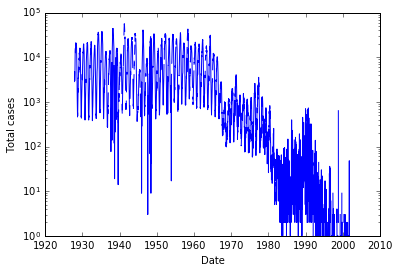

In [30]:
plt.semilogy(p_short.sum(axis=1))
plt.xlabel("Date")
plt.ylabel("Total cases");

## Aggregation

The `.groupby()` and `.aggregate()` functions make it easy to compute averages, means, medians, etc. by any groups you specify in the data.  In this case, for example, we can find the average number of cases by week of year for each state:



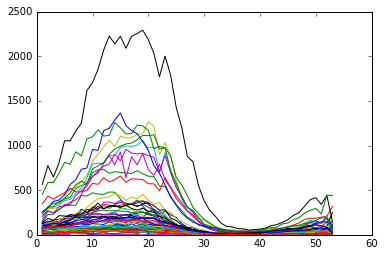

In [36]:
p_week = p_short.groupby(p_dateinfo.WEEK)    ## group by week
p_week_mean = p_week.aggregate(np.mean)      ## compute mean by week
plt.plot(p_week_mean);                       ## plot

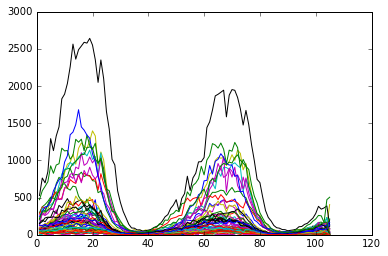

In [38]:
biweek = 52*(p_dateinfo.YEAR % 2) + p_dateinfo.WEEK
p_biweek_mean = p_short.groupby(biweek).aggregate(np.mean) 
plt.plot(p_biweek_mean);    


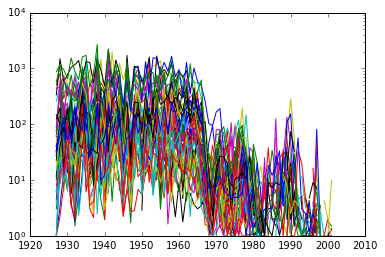

In [42]:
p_year_mean = p_short.groupby(p_dateinfo.YEAR).aggregate(np.mean) 
plt.semilogy(p_year_mean);    


Still very noisy.  How about a 5-year mean?

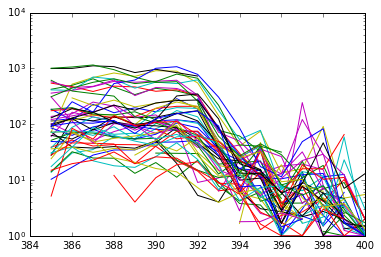

In [64]:
biyear = np.floor(p_dateinfo.YEAR/5)
p_5year_mean = p_short.groupby(biyear).aggregate(np.mean) 
plt.semilogy(p_5year_mean);

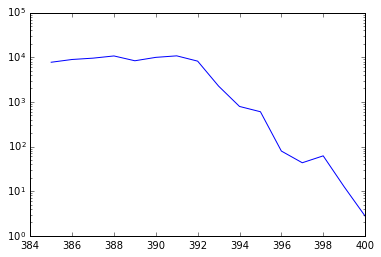

In [66]:
p_tot = p_short.sum(axis=1)
p_5year_totmean = p_tot.groupby(biyear).aggregate(np.mean) 
plt.semilogy(p_5year_totmean);

Things get a messy toward the end; the mean keeps declining, but things start to look noisier.  I tried looking at various things (coefficient of variance = std dev/mean, std dev on the log scale ...) but so far I haven't got a statistic that captures my sense of what "noisier" means ...

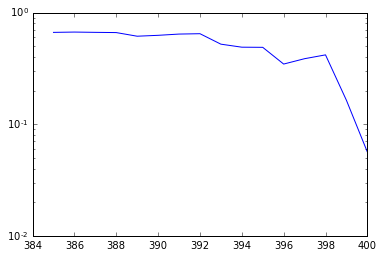

In [70]:
p_short_log10 = np.log10(1+p_short)      ## log scale
p_tot_logstd = p_short_log10.std(axis=1)
p_5year_logstd = p_tot_logstd.groupby(biyear).aggregate(np.mean) 
plt.semilogy(p_5year_logstd);

## Dates and times

[reference](https://docs.python.org/3.0/library/datetime.html)

- (Another) complex subject. 
- Lots of [possible date formats](https://xkcd.com/1179/)
- Basic idea: something like `%Y-%m-%d`; separators just match whatever's in your data (usually "/" or "-"). Results need to be unambiguous, and ambiguity is dangerous (how is day of month specified?  lower case, capital? etc.)
- `pandas` tries to guess, but you shouldn't let it.


In [72]:
print(pd.to_datetime("05-01-2004"))
print(pd.to_datetime("05-01-2004",format="%m-%d-%Y"))


2004-05-01 00:00:00
2004-05-01 00:00:00


- Time zones and daylight savings time can be a nightmare
- May need to have the right number of digits, especially in the absence of separators:


In [73]:
print(pd.to_datetime("1212004",format="%m%d%Y"))
print(pd.to_datetime("12012004",format="%m%d%Y"))

2004-12-01 00:00:00
2004-12-01 00:00:00


For our measles data we have week of year, so things get a little complicated

In [71]:
yearstr = p_dateinfo.YEAR.apply(format)
weekstr = p_dateinfo.WEEK.apply(format,args=["02"])
datestr = yearstr+"-"+weekstr+"-0"
dateindex = pd.to_datetime(datestr,format="%Y-%U-%w")
dateindex.head()

1927.884615   1927-11-20
1927.903846   1927-11-27
1927.923077   1927-12-04
1927.942308   1927-12-11
1927.961538   1927-12-18
dtype: datetime64[ns]

Once you have converted variables to real date/time formats, you can more easily group by days, weeks, months, ... etc.